In [31]:
!nvidia-smi

Sun Sep 21 22:52:26 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  | 00000000:41:00.0 Off |                    0 |
| N/A   30C    P0              92W / 500W |    424MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [27]:
#!/usr/bin/env python3
"""
Complete Machine Learning Pipeline for scATAC Cell Type Classification
Handles class imbalance, prevents overfitting, and provides comprehensive evaluation
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Preprocessing Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Imbalance handling Libraries
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Evaluation Libraries
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve, auc)

# Visualization Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [23]:
data_dir = "home/toheeb.jumah/Codeathon/python_ready_data"

Starting scATAC Cell Type Classification Pipeline..
=== scATAC ML Pipeline Initialized... ===
=== Starting Complete ML Pipeline ===

1. Loading data from R processing outputs...
   Combined features loaded: (1463, 7000)
   Final dataset: 1463 cells, 7000 features
   Cell types: {'Monocyte': 623, 'T_cells': 616, 'B_cell': 134, 'NK_cell': 82, 'Pre-B_cell_CD34-': 5, 'HSC_-G-CSF': 3}
   Removed 8 cells from rare types: ['Pre-B_cell_CD34-', 'HSC_-G-CSF']
 Step 1/13 completed successfully

2. Analyzing class distribution...
   Class Distribution:
  Cell_Type  Count  Proportion  Imbalance_Ratio
0  Monocyte    623       0.428            1.000
1   T_cells    616       0.423            1.011
2    B_cell    134       0.092            4.649
3   NK_cell     82       0.056            7.598
   Maximum imbalance ratio: 7.60
   Balancing needed : True


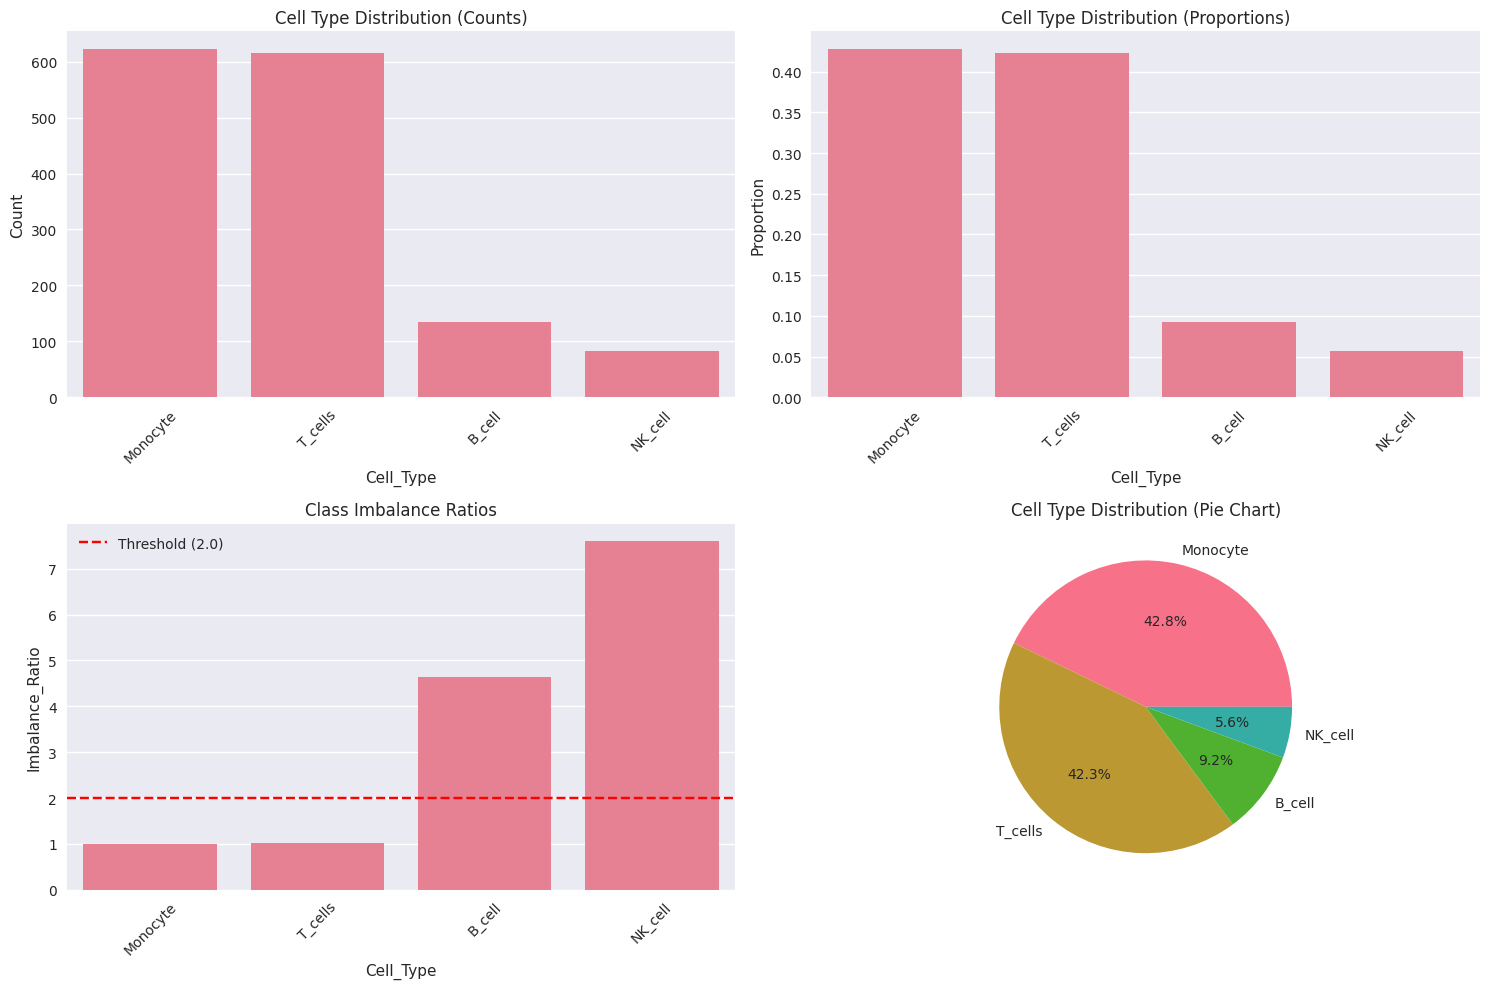

 Step 2/13 completed successfully

3. Feature engineering...
   Removed 106 zero-variance features
   Removed 6 highly correlated features (>0.95)
   Selected top 1000 features using univariate selection
   Final feature matrix: (1455, 1000)
 Step 3/13 completed successfully

4. Creating train/test splits...
   Training set: 1164 samples
   Test set: 291 samples
   Class distribution in splits:
   Train_Count  Test_Count  Train_Prop  Test_Prop
1          498         125       0.428      0.430
3          493         123       0.424      0.423
0          107          27       0.092      0.093
2           66          16       0.057      0.055
 Step 4/13 completed successfully

5. Handling class imbalance...
   Applying SMOTE for class balancing...
   Balancing results:
   Before_SMOTE  After_SMOTE  Improvement
0           107          498     4.654206
1           498          498     1.000000
2            66          498     7.545455
3           493          498     1.010142


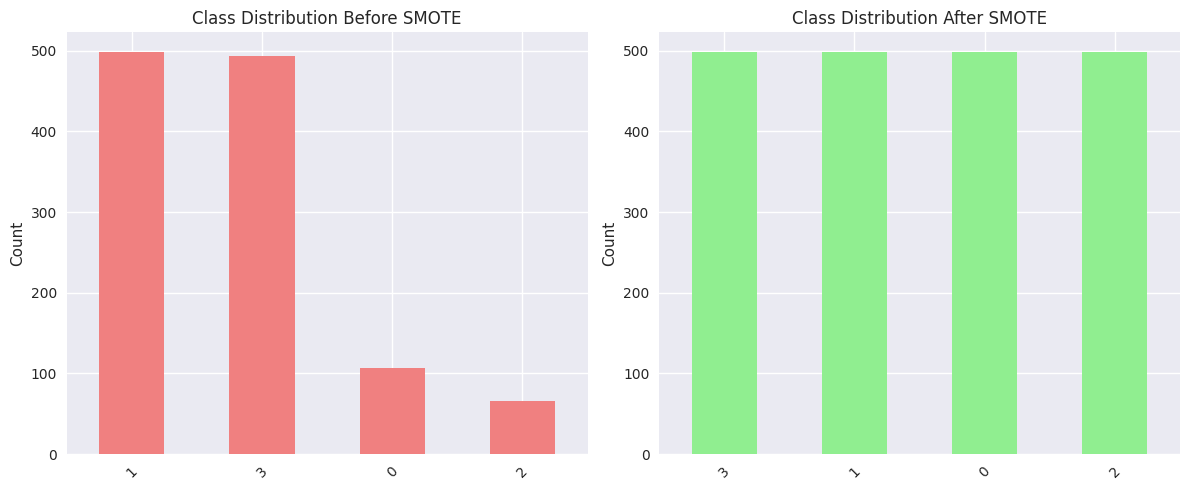

 Step 5/13 completed successfully

6. Scaling features...
   Features scaled using StandardScaler
   Training mean: -0.000000
   Training std: 1.000251
 Step 6/13 completed successfully

7. Defining ML models ...
   Defined 3 models 
     - Random Forest: RandomForestClassifier
     - XGBoost: XGBClassifier
     - SVM: SVC
 Step 7/13 completed successfully

8. Training and evaluating models...

   Training Random Forest...
     Random Forest training completed

   Training XGBoost...
     XGBoost training completed

   Training SVM...
     SVM training completed
 Step 8/13 completed successfully

9. Calculating evaluation metrics...

   Model Performance Summary:
           Model  Accuracy  Precision  Recall  F1_Score     AUC
0  Random Forest    0.9759     0.9752  0.9759    0.9753  0.9985
1        XGBoost    0.9828     0.9827  0.9828    0.9825  0.9993
2            SVM    0.9759     0.9766  0.9759    0.9746  0.9976
 Step 9/13 completed successfully

10. Creating detailed evaluation tabl

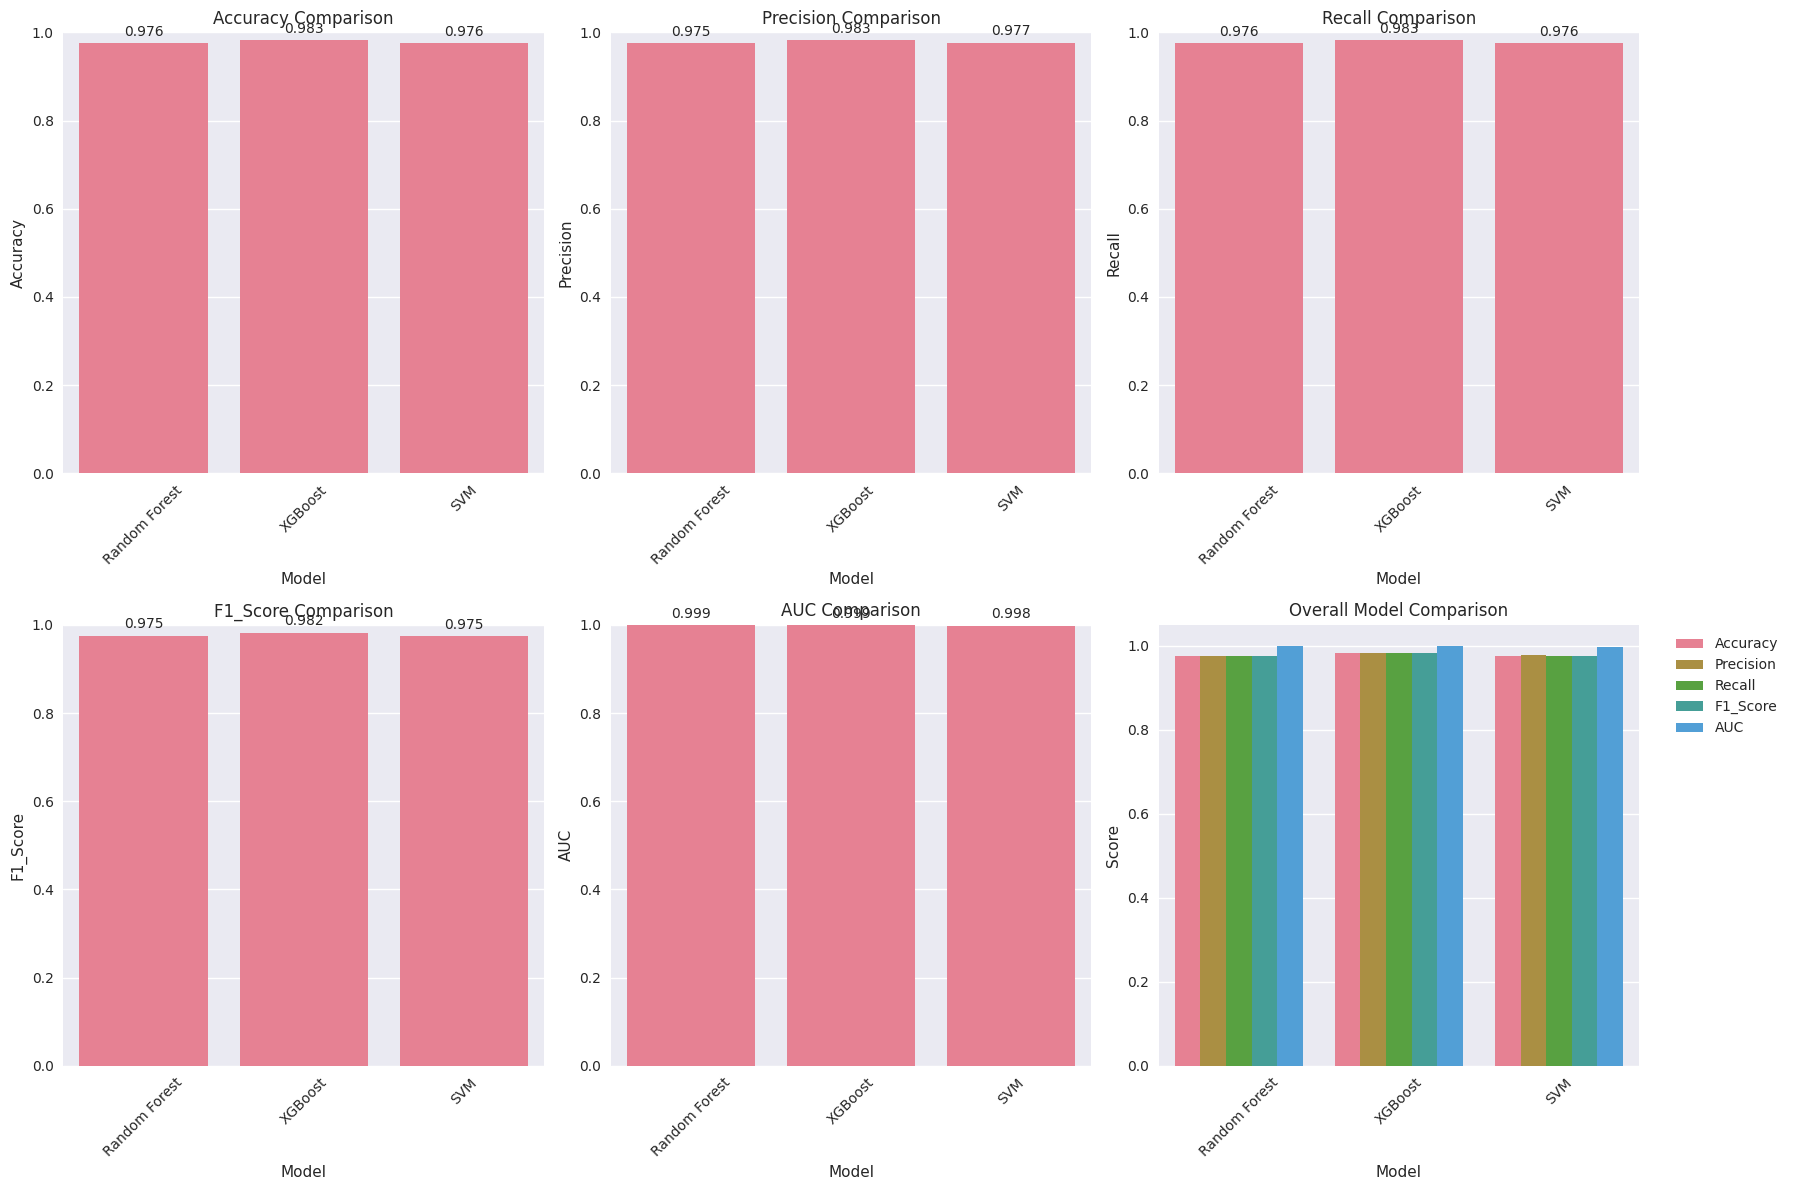

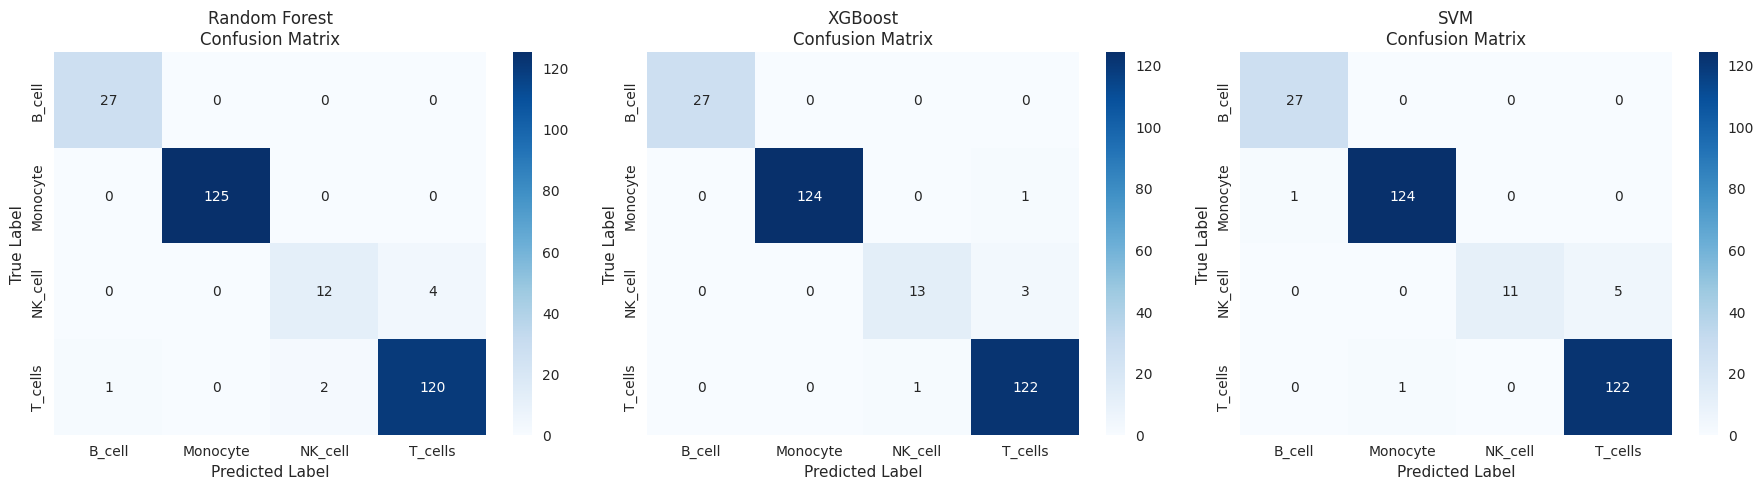

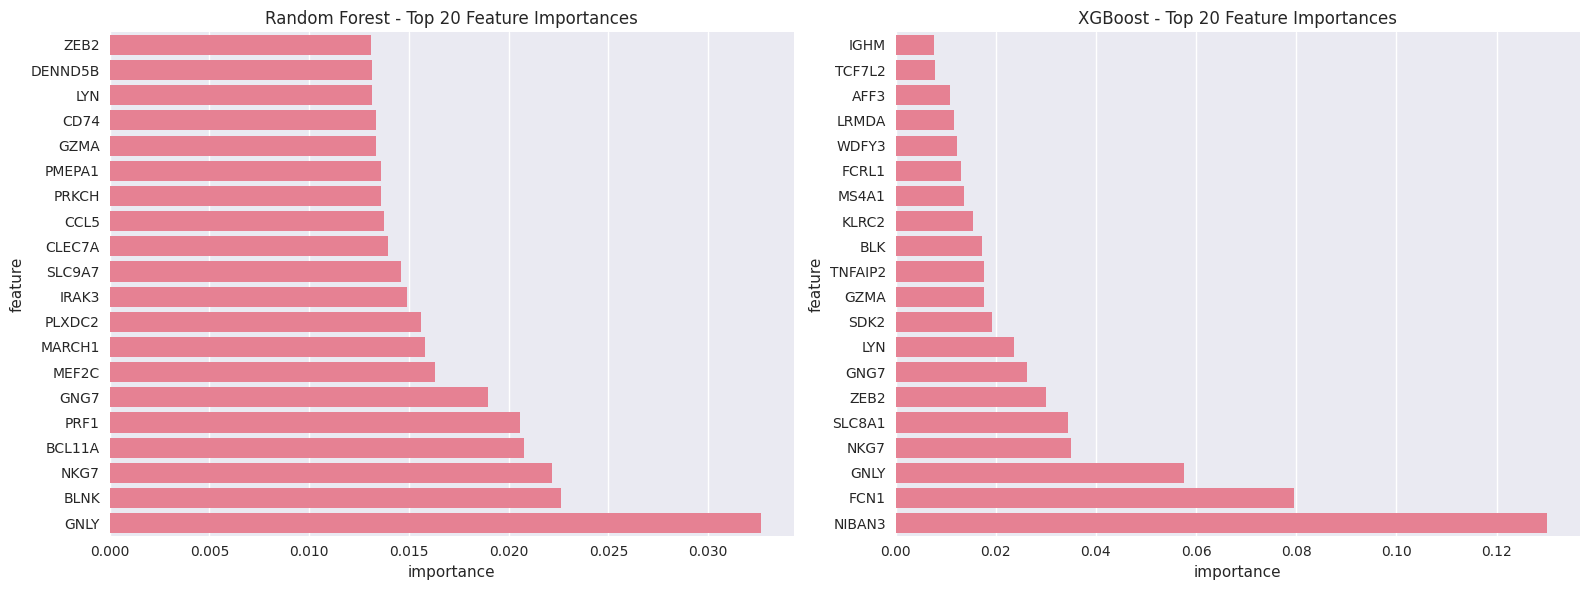

 Step 11/13 completed successfully

12. Analyzing overfitting with cross-validation...
     Cross-validating Random Forest...
     Cross-validating XGBoost...
     Cross-validating SVM...

   Cross-Validation Results:
               Train_Accuracy :  Validation_Accuracy :   Overfitting_Gap:   \
Random Forest            0.9887                  0.9784             0.0103   
XGBoost                  1.0000                  0.9890             0.0110   
SVM                      1.0000                  0.9915             0.0085   

               Train_Std:   Val_Std  
Random Forest       0.0016   0.0047  
XGBoost             0.0000   0.0026  
SVM                 0.0000   0.0049  
 Step 12/13 failed: 'Train_Accuracy'

 Pipeline failed..... Check error messages above!!


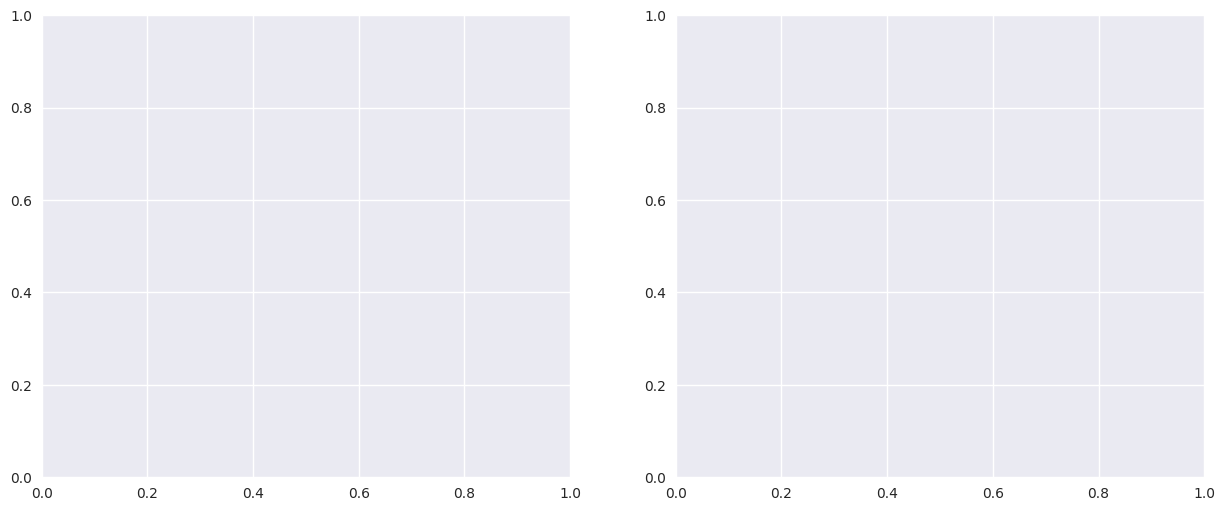

In [30]:
class scATACMLPipeline:
    """this is a Complete ML Pipeline for scATAC cell type classification..."""
    
    def __init__(self, data_dir):
        """Initialize pipeline with data directory"""
        self.data_dir = Path("/home/toheeb.jumah")
        self.models = {}
        self.results = {}
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        
        print("=== scATAC ML Pipeline Initialized... ===")
    
    def load_data(self):
        """Load and prepare data from R processing outputs"""
        print("\n1. Loading data from R processing outputs...")
        
        try:
            # load main featuree matrix
            if (self.data_dir / "combined_features.csv").exists():
                self.X = pd.read_csv(self.data_dir / "combined_features.csv", index_col=0)
                print(f"   Combined features loaded: {self.X.shape}")
            else:
                # Fallback to team outputs
                X_rna = pd.read_csv(self.data_dir / "rna_features_2000.csv", index_col=0)
                X_atac = pd.read_csv(self.data_dir/ "atac_features_5000.csv", index_col=0)
                
                # find common cells....
                common_cells = X_rna.index.intersection(X_atac.index)
                self.X = pd.concat([X_rna.loc[common_cells], X_atac.loc[common_cells]], axis=1)
                print(f"  Combined from team outputs: {self.X.shape}")
            
            # load labels
            if (self.data_dir / "cell_labels.csv").exists():
                labels_df = pd.read_csv(self.data_dir / "cell_labels.csv", index_col=0)
            else:
                labels_df = pd.read_csv(self.data_dir / "cell_type_distribution.csv", index_col=0)
            
            # Match labels to features...:
            common_cells = self.X.index.intersection(labels_df.index)
            self.X = self.X.loc[common_cells]
            self.y = labels_df.loc[common_cells, 'cell_type']
            
            print(f"   Final dataset: {self.X.shape[0]} cells, {self.X.shape[1]} features")
            print(f"   Cell types: {self.y.value_counts().to_dict()}")

            # Remove rare classes (<10 samples)
            counts = self.y.value_counts()
            keep_types = counts[counts >= 10].index
            mask = self.y.isin(keep_types)
            removed = (~mask).sum()
            
            if removed > 0:
                rare_types = counts[counts < 10].index.tolist()
                self.X = self.X.loc[mask]
                self.y = self.y.loc[mask]
                print(f"   Removed {removed} cells from rare types: {rare_types}")
            else:
                print("   No rare cell types (<10) to remove.")
                
            # (Optional safety) ensure something remains
            if self.X.empty:
                raise ValueError("All cells were filtered out by the rare-type threshold.")

            # Encode labels.. for the model
            self.y_encoded = self.label_encoder.fit_transform(self.y)
            self.class_names = self.label_encoder.classes_
            return True
            
        except Exception as e:
            print(f"   Error loading data: {e}")
            return False

    def analyze_class_imbalance(self):
        """Analyze and visualize class distribution"""
        print("\n2. Analyzing class distribution...")
        
        # Calculate class distribution
        class_counts = pd.Series(self.y).value_counts()
        class_props = pd.Series(self.y).value_counts(normalize=True)
        
        # Create imbalance analysis
        imbalance_df = pd.DataFrame({
            'Cell_Type': class_counts.index,
            'Count': class_counts.values,
            'Proportion': class_props.values,
            'Imbalance_Ratio': class_counts.max() / class_counts.values
        })
        
        print("   Class Distribution:")
        print(imbalance_df.round(3))
        
        # Check if balancing is needed or not...:
        max_ratio = imbalance_df['Imbalance_Ratio'].max()
        self.needs_balancing = max_ratio > 2.0
        
        print(f"   Maximum imbalance ratio: {max_ratio:.2f}")
        print(f"   Balancing needed : {self.needs_balancing}")
        #-----------------------------------------------------------------------------
        #----------------------------- # Visualizations: ---------------------------------

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Class counts
        sns.barplot(data=imbalance_df, x='Cell_Type', y='Count', ax=axes[0,0])
        axes[0,0].set_title('Cell Type Distribution (Counts)')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Class proportions
        sns.barplot(data=imbalance_df, x='Cell_Type', y='Proportion', ax=axes[0,1])
        axes[0,1].set_title('Cell Type Distribution (Proportions)')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Imbalance ratios
        sns.barplot(data=imbalance_df, x='Cell_Type', y='Imbalance_Ratio', ax=axes[1,0])
        axes[1,0].set_title('Class Imbalance Ratios')
        axes[1,0].axhline(y=2.0, color='red', linestyle='--', label='Threshold (2.0)')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].legend()
        
        # Pie chart
        axes[1,1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
        axes[1,1].set_title('Cell Type Distribution (Pie Chart)')
        
        plt.tight_layout()
        plt.savefig('class_distribution_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        self.imbalance_df = imbalance_df
        return imbalance_df
    
    def feature_engineering(self):
        """Apply feature engineering and selection"""
        print("\n3. Feature engineering...")
        
        # Remove features with zero variance
        zero_var_features = self.X.columns[self.X.var() == 0]
        if len(zero_var_features) > 0:
            self.X = self.X.drop(columns=zero_var_features)
            print(f"   Removed {len(zero_var_features)} zero-variance features")
        
        # Remove highly correlated featuress 
        corr_matrix = self.X.corr().abs()
        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
        
        if len(high_corr_features) > 0:
            self.X = self.X.drop(columns=high_corr_features)
            print(f"   Removed {len(high_corr_features)} highly correlated features (>0.95)")
        
        # Feature selection using SelectKBest
        selector = SelectKBest(score_func=f_classif, k=min(1000, self.X.shape[1]//2))
        X_selected = selector.fit_transform(self.X, self.y_encoded)
        selected_features = self.X.columns[selector.get_support()]
        
        self.X_engineered = pd.DataFrame(X_selected, index=self.X.index, columns=selected_features)
        
        print(f"   Selected top {len(selected_features)} features using univariate selection")
        print(f"   Final feature matrix: {self.X_engineered.shape}")
        
        return self.X_engineered
    
    def prepare_train_test_split(self):
        """Create train/test splits with proper stratification"""
        print("\n4. Creating train/test splits...")
        
        # Stratified split maintaining class proportions
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X_engineered, self.y_encoded,
            test_size=0.2, 
            random_state=42,
            stratify=self.y_encoded
        )
        
        print(f"   Training set: {self.X_train.shape[0]} samples")
        print(f"   Test set: {self.X_test.shape[0]} samples")
        
        # Show class distribution in splits.............
        train_dist = pd.Series(self.y_train).value_counts()
        test_dist = pd.Series(self.y_test).value_counts()
        
        split_df = pd.DataFrame({
            'Train_Count': train_dist,
            'Test_Count': test_dist,
            'Train_Prop': train_dist / len(self.y_train),
            'Test_Prop': test_dist / len(self.y_test)
        }).fillna(0)
        
        print("   Class distribution in splits:")
        print(split_df.round(3))
        
        return True
    
    def handle_class_imbalance(self):
        """Apply class balancing techniques if needed ..."""
        print("\n5. Handling class imbalance...")
        
        if not self.needs_balancing:
            print("   No significant imbalance detected... Skipping balancing.")
            self.X_train_balanced = self.X_train.copy()
            self.y_train_balanced = self.y_train.copy()
            return
        
        print("   Applying SMOTE for class balancing...")
        
        # Apply SMOTE
        smote = BorderlineSMOTE(kind="borderline-1", k_neighbors=3)
        self.X_train_balanced, self.y_train_balanced = smote.fit_resample(
            self.X_train, self.y_train
        )
        
        # Compare before and after
        before_counts = pd.Series(self.y_train).value_counts()
        after_counts = pd.Series(self.y_train_balanced).value_counts()
        
        comparison_df = pd.DataFrame({
            'Before_SMOTE': before_counts,
            'After_SMOTE': after_counts,
            'Improvement': after_counts / before_counts
        }).fillna(0)
        
        print("   Balancing results:")
        print(comparison_df)
        
        # Visualize balancing effect
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Before balancing
        before_counts.plot(kind='bar', ax=ax1, color='lightcoral')
        ax1.set_title('Class Distribution Before SMOTE')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)
        
        # After balancing
        after_counts.plot(kind='bar', ax=ax2, color='lightgreen')
        ax2.set_title('Class Distribution After SMOTE')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig('class_balancing_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return comparison_df
    
    def scale_features(self):
        """Scale features for algorithms that require it"""
        print("\n6. Scaling features...")
        
        # Fit scaler on training data only
        self.X_train_scaled = pd.DataFrame(
            self.scaler.fit_transform(self.X_train_balanced),
            index=self.X_train_balanced.index,
            columns=self.X_train_balanced.columns
        )
        
        self.X_test_scaled = pd.DataFrame(
            self.scaler.transform(self.X_test),
            index=self.X_test.index,
            columns=self.X_test.columns
        )
        
        print(f"   Features scaled using StandardScaler")
        print(f"   Training mean: {self.X_train_scaled.mean().mean():.6f}")
        print(f"   Training std: {self.X_train_scaled.std().mean():.6f}")
        
        return True
    


#------------------------------------ building models.....------------------------------------
#---------------------------------------------------------------------------------------------

    def define_models(self):
        """Define models with optimized hyperparameters for preventing overfitting"""
        print("\n7. Defining ML models ...")
        
        n_classes = len(self.class_names)
        n_features = self.X_train_balanced.shape[1]
        n_samples = self.X_train_balanced.shape[0]
        
        # Random Forest - Conservative parameters
        self.models['Random Forest'] = {
            'model': RandomForestClassifier(
                n_estimators=100,           # Moderate number of trees
                max_depth=10,               # Limit depth to prevent overfitting
                min_samples_split=20,       # Require more samples to split
                min_samples_leaf=10,        # Require more samples in leaf
                max_features='sqrt',        # Feature subsampling
                class_weight='balanced',    # Handle any remaining imbalance
                random_state=42,
                n_jobs=-1
            ),
            'requires_scaling': False
        }
        
        # XGBoost - With regularization
        self.models['XGBoost'] = {
            'model': XGBClassifier(
                n_estimators=100,
                max_depth=6,                # Moderate depth
                learning_rate=0.1,          # Conservative learning rate
                subsample=0.8,              # Subsample rows
                colsample_bytree=0.8,       # Subsample features
                reg_alpha=0.1,              # L1 regularization
                reg_lambda=1.0,             # L2 regularization
                min_child_weight=3,         # Minimum samples in leaf
                random_state=42,
                eval_metric='mlogloss' if n_classes > 2 else 'logloss',
                verbosity=0
            ),
            'requires_scaling': False
        }
        
        # SVM - With regularization
        self.models['SVM'] = {
            'model': SVC(
                C=1.0,                      # Regularization parameter
                kernel='rbf',
                gamma='scale',              # Automatic gamma scaling
                class_weight='balanced',    # Handle imbalance
                probability=True,           # Enable probability estimates
                random_state=42
            ),
            'requires_scaling': True
        }
        
        print(f"   Defined {len(self.models)} models ")
        for name, config in self.models.items():
            print(f"     - {name}: {type(config['model']).__name__}")
        
        return self.models
    
    def train_and_evaluate_models(self):
        """Train all models and evaluate performance"""
        print("\n8. Training and evaluating models...")
        
        for model_name, config in self.models.items():
            print(f"\n   Training {model_name}...")
            
            # Select appropriate data (scaled vs unscaled)
            if config['requires_scaling']:
                X_train = self.X_train_scaled
                X_test = self.X_test_scaled
            else:
                X_train = self.X_train_balanced
                X_test = self.X_test
            
            # Train model
            model = config['model']
            model.fit(X_train, self.y_train_balanced)
            
            # Predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)
            
            # Store results
            self.results[model_name] = {
                'model': model,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'X_test': X_test
            }
            
            print(f"     {model_name} training completed")
        
        return self.results
    
    def calculate_metrics(self):
        """Calculate comprehensive evaluation metrics"""
        print("\n9. Calculating evaluation metrics...")
        
        metrics_data = []
        
        for model_name, results in self.results.items():
            y_pred = results['y_pred']
            y_pred_proba = results['y_pred_proba']
            
            # Basic metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            precision = precision_score(self.y_test, y_pred, average='weighted')
            recall = recall_score(self.y_test, y_pred, average='weighted')
            f1 = f1_score(self.y_test, y_pred, average='weighted')
            
            # Multi-class AUC
            if len(self.class_names) > 2:
                auc_score = roc_auc_score(self.y_test, y_pred_proba, multi_class='ovr', average='weighted')
            else:
                auc_score = roc_auc_score(self.y_test, y_pred_proba[:, 1])
            
            metrics_data.append({
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'AUC': auc_score
            })
        
        self.metrics_df = pd.DataFrame(metrics_data)
        
        print("\n   Model Performance Summary:")
        print(self.metrics_df.round(4))
        
        return self.metrics_df
    
    def create_detailed_evaluation_table(self):
        """Create detailed per-class evaluation metrics"""
        print("\n10. Creating detailed evaluation tables...")
        
        detailed_results = {}
        
        for model_name, results in self.results.items():
            y_pred = results['y_pred']
            
            # Get per-class metrics
            report = classification_report(
                self.y_test, y_pred,
                target_names=self.class_names,
                output_dict=True
            )
            
            # Convert to DataFrame
            class_metrics = pd.DataFrame(report).transpose()
            class_metrics = class_metrics.drop(['accuracy'], errors='ignore')
            class_metrics = class_metrics.round(4)
            
            detailed_results[model_name] = class_metrics
            
            print(f"\n   {model_name} - Per-class Metrics:")
            print(class_metrics)
        
        self.detailed_results = detailed_results
        return detailed_results
    
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("\n11. Creating visualizations...")
        
        # 1. Model comparison
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()
        
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC']
        
        for i, metric in enumerate(metrics):
            sns.barplot(data=self.metrics_df, x='Model', y=metric, ax=axes[i])
            axes[i].set_title(f'{metric} Comparison')
            axes[i].set_ylim(0, 1)
            axes[i].tick_params(axis='x', rotation=45)
            
            # Add value labels
            for j, v in enumerate(self.metrics_df[metric]):
                axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
        
        # Overall comparison
        metrics_melted = self.metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
        sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', ax=axes[5])
        axes[5].set_title('Overall Model Comparison')
        axes[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[5].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Confusion matrices
        fig, axes = plt.subplots(1, len(self.models), figsize=(6*len(self.models), 5))
        if len(self.models) == 1:
            axes = [axes]
        
        for i, (model_name, results) in enumerate(self.results.items()):
            cm = confusion_matrix(self.y_test, results['y_pred'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=self.class_names, 
                       yticklabels=self.class_names, 
                       ax=axes[i])
            axes[i].set_title(f'{model_name}\nConfusion Matrix')
            axes[i].set_ylabel('True Label')
            axes[i].set_xlabel('Predicted Label')
        
        plt.tight_layout()
        plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 3. ROC Curves (if binary classification)
        if len(self.class_names) == 2:
            plt.figure(figsize=(10, 8))
            
            for model_name, results in self.results.items():
                y_pred_proba = results['y_pred_proba'][:, 1]
                fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
                auc_score = auc(fpr, tpr)
                
                plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
            
            plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curves Comparison')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
            plt.show()
        
        # 4. Feature importance (for tree-based models)
        rf_model = self.results['Random Forest']['model']
        xgb_model = self.results['XGBoost']['model']
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Random Forest importance
        rf_importance = pd.DataFrame({
            'feature': self.X_train_balanced.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=True).tail(20)
        
        sns.barplot(data=rf_importance, x='importance', y='feature', ax=ax1)
        ax1.set_title('Random Forest - Top 20 Feature Importances')
        
        # XGBoost importance
        xgb_importance = pd.DataFrame({
            'feature': self.X_train_balanced.columns,
            'importance': xgb_model.feature_importances_
        }).sort_values('importance', ascending=True).tail(20)
        
        sns.barplot(data=xgb_importance, x='importance', y='feature', ax=ax2)
        ax2.set_title('XGBoost - Top 20 Feature Importances')
        
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return True
    
    def detect_overfitting(self):
        """Analyze potential overfitting using cross-validationn """
        print("\n12. Analyzing overfitting with cross-validation...")
        
        cv_results = {}
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        for model_name, config in self.models.items():
            print(f"     Cross-validating {model_name}...")
            
            model = config['model']
            
            # Select appropriate data... 
            if config['requires_scaling']:
                X_data = self.X_train_scaled
            else:
                X_data = self.X_train_balanced
            
            train_scores = []
            val_scores = []
            
            for train_idx, val_idx in cv.split(X_data, self.y_train_balanced):
                X_train_fold = X_data.iloc[train_idx]
                X_val_fold = X_data.iloc[val_idx]

                y_train_fold = self.y_train_balanced[train_idx]
                y_val_fold = self.y_train_balanced[val_idx]
                
                # Train and evaluate
                model_copy = type(model)(**model.get_params())
                model_copy.fit(X_train_fold, y_train_fold)
                
                train_score = model_copy.score(X_train_fold, y_train_fold)
                val_score = model_copy.score(X_val_fold, y_val_fold)
                
                train_scores.append(train_score)
                val_scores.append(val_score)
            
            avg_train = np.mean(train_scores)
            avg_val = np.mean(val_scores)
            overfitting_gap = avg_train - avg_val
            
            cv_results[model_name] = {
                'Train_Accuracy :': avg_train,
                'Validation_Accuracy : ': avg_val,
                'Overfitting_Gap: ': overfitting_gap,
                'Train_Std: ': np.std(train_scores),
                'Val_Std': np.std(val_scores)
            }
        
        cv_df = pd.DataFrame(cv_results).T.round(4)
        
        print("\n   Cross-Validation Results:")
        print(cv_df)
        
        # Visualize overfitting analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Train vs Validation scores
        x_pos = np.arange(len(cv_df))
        width = 0.35
        
        ax1.bar(x_pos - width/2, cv_df['Train_Accuracy'], width, 
               label='Training Accuracy', alpha=0.8)
        ax1.bar(x_pos + width/2, cv_df['Validation_Accuracy'], width, 
               label='Validation Accuracy', alpha=0.8)
        
        ax1.set_xlabel('Models')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Training vs. Validation Accuracy')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(cv_df.index, rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Overfitting gaps
        sns.barplot(x=cv_df.index, y=cv_df['Overfitting_Gap'], ax=ax2)
        ax2.set_title('Overfitting Gap (Train - Validation) ')
        ax2.set_ylabel('Accuracy Gap')

        ax2.axhline(y=0.05, color='red', linestyle='--', label='Warning Threshold (0.05)')
        ax2.axhline(y=0.1, color='red', linestyle='-', label='Critical Threshold (0.1)')
        ax2.legend()
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig('overfitting_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Overfitting warnings
        print("\n   Overfitting Analysis:")
        for model_name, results in cv_results.items():
            gap = results['Overfitting_Gap']
            if gap > 0.1:
                print(f"     WARNING: {model_name} shows significant overfitting (gap: {gap:.3f})")
            elif gap > 0.05:
                print(f"     CAUTION: {model_name} shows moderate overfitting (gap: {gap:.3f})")
            else:
                print(f"     GOOD: {model_name} shows minimal overfitting (gap: {gap:.3f})")
        
        self.cv_results = cv_df
        return cv_df
    
    def generate_final_report(self):
        """Generate comprehensive final report"""
        print("\n13. Generating final report...")
        
        # Create summary report...:
        report = {
            'Dataset_Info': {
                'Total_Samples': len(self.y),
                'Total_Features_Original': self.X.shape[1] if hasattr(self, 'X') else 'N/A',
                'Total_Features_Final': self.X_engineered.shape[1],
                'Cell_Types': len(self.class_names),
                'Class_Names': list(self.class_names)
            },
            'Class_Distribution': self.imbalance_df.to_dict('records'),
            'Balancing_Applied': self.needs_balancing,
            'Model_Performance': self.metrics_df.to_dict('records'),
            'Cross_Validation': self.cv_results.to_dict() if hasattr(self, 'cv_results') else None
        }
        
        # Find best model ...: 

        best_model_idx = self.metrics_df['F1_Score'].idxmax()
        best_model_name = self.metrics_df.loc[best_model_idx, 'Model']
        best_f1_score = self.metrics_df.loc[best_model_idx, 'F1_Score']
        
        print(f"\n=== ..... FINAL RESULTS.... ===")
        print(f"Best Model: {best_model_name}")
        print(f"Best F1-Score: {best_f1_score:.4f}")
        print(f"Dataset: {len(self.y)} cells, {self.X_engineered.shape[1]} features")
        print(f"Cell Types: {len(self.class_names)}")
        print(f"Class Balancing Applied: {self.needs_balancing}")
        
        # Save results
        import json
        with open('ml_pipeline_report.json', 'w') as f:
            json.dump(report, f, indent=2, default=str)
        
        # Save metrics tables
        self.metrics_df.to_csv('model_performance_summary.csv', index=False)
        
        # Save detailed results
        with pd.ExcelWriter('detailed_model_results.xlsx') as writer:
            self.metrics_df.to_excel(writer, sheet_name='Summary', index=False)
            if hasattr(self, 'cv_results'):
                self.cv_results.to_excel(writer, sheet_name='Cross_Validation')
            self.imbalance_df.to_excel(writer, sheet_name='Class_Distribution', index=False)
            
            for model_name, class_metrics in self.detailed_results.items():
                class_metrics.to_excel(writer, sheet_name=f'{model_name}_Details')
        
        print("\nFiles Generated:")
        print("  - ml_pipeline_report.json")
        print("  - model_performance_summary.csv")
        print("  - detailed_model_results.xlsx")
        print("  - Multiple visualization PNG files")
        
        return report
    
    def run_complete_pipeline(self):
        """Execute the pipeline  .."""
        print("=== Starting Complete ML Pipeline ===")
        
        # Execute all steps
        steps = [
            self.load_data,
            self.analyze_class_imbalance,
            self.feature_engineering,
            self.prepare_train_test_split,
            self.handle_class_imbalance,
            self.scale_features,
            self.define_models,
            self.train_and_evaluate_models,
            self.calculate_metrics,
            self.create_detailed_evaluation_table,
            self.create_visualizations,
            self.detect_overfitting,
            self.generate_final_report
        ]
        
        for i, step in enumerate(steps, 1):
            try:
                step()
                print(f" Step {i}/{len(steps)} completed successfully")
            except Exception as e:
                print(f" Step {i}/{len(steps)} failed: {e}")
                return False
        
        print("\n=== Pipeline Completed Successfully ...! ===")
        return True

# ================================================================================================
# USAGE AND EXECUTION ...... for running: 
# ================================================================================================

def main():
    """Main execution function"""
    print("Starting scATAC Cell Type Classification Pipeline..")
    
    # Initialize pipeline
    pipeline = scATACMLPipeline(data_dir="python_ready_data")
    
    # Run complete pipeline
    success = pipeline.run_complete_pipeline()
    
    if success:
        print("\n... Pipeline completed successfully!")
        print("\n  Key Results:")

        print(f"- Best Model: {pipeline.metrics_df.loc[pipeline.metrics_df['F1_Score'].idxmax(), 'Model']}")
        print(f"- Best F1-Score : {pipeline.metrics_df['F1_Score'].max():.4f}")
        print(f"- Models Evaluated  : {len(pipeline.models)}")
        print(f"- Features Used: {pipeline.X_engineered.shape[1]}")
        
        # showw final metrics table:......

        print("\nFinal Model Comparison:")
        print(pipeline.metrics_df.round(4).to_string(index=False))
        
    else:
        print("\n Pipeline failed..... Check error messages above!!")

# Execute if run directly:,,
if __name__ == "__main__":
    main()

# ================================================================================================
# ADDITIONAL UTILITY FUNCTIONS: ................
# ================================================================================================

def create_summary_table():
    """Create a formatted summary table of all results"""
    
    # This can be called separately to create publication-ready tables
    pipeline = scATACMLPipeline()
    
    if hasattr(pipeline, 'metrics_df'):
        # Create styled table
        styled_table = pipeline.metrics_df.round(4).style.format({
            'Accuracy': '{:.4f}',
            'Precision': '{:.4f}',
            'Recall': '{:.4f}',
            'F1_Score': '{:.4f}',
            'AUC': '{:.4f}'
        }).background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC'])
        
        return styled_table
    else:
        print("Pipeline must be run first to generate summary table")
        return None

def plot_learning_curves(pipeline, model_name):
    """Plot learning curves for a specific model to analyze overfitting"""
    from sklearn.model_selection import learning_curve
    
    model_config = pipeline.models[model_name]
    model = model_config['model']
    
    # Select appropriate data
    if model_config['requires_scaling']:
        X_data = pipeline.X_train_scaled
    else:
        X_data = pipeline.X_train_balanced
    
    # Generate learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_data, pipeline.y_train_balanced,
        cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted'
    )
    
    # Plot
    plt.figure(figsize=(10, 6))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curves - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'learning_curves_{model_name.lower().replace(" ", "_")}.png', dpi=300)
    plt.show()

In [ ]:
# Instructions for usage.... read this carefully...: 
print("""
=== scATAC ML Pipeline Usage Instructions ===

1. Ensure your data files are in the correct directory structure:
   - python_ready_data/combined_features.csv (or team output files)
   - python_ready_data/cell_labels.csv (or team output files)

2. Run the complete pipeline:
   python ml_pipeline.py

3. The pipeline will automatically:
   - Load and analyze your data..
   - Handle class imbalance if needed
   - Train multiple models with anti-overfitting parameters
   - Evaluate performance with comprehensive metrics
   - Generate visualizations and reports

4. Output files will include:
   - Model performance summaries (CSV, Excel)
   - Detailed per-class metrics
   - Comprehensive visualizations
   - Overfitting analysis
   - JSON report with all results

5. Models included:
   - Random Forest (with conservative parameters)
   - XGBoost (with L1/L2 regularization)
   - SVM (with balanced class weights)

All models are configured to prevent overfitting while maintaining high performance.
""")